#Sonar

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/sonar.jpg" width="800">

http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

NAME: Sonar, Mines vs. Rocks

SUMMARY: This is the data set used by Gorman and Sejnowski in their study of the classification of sonar signals using a neural network [1]. The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

SOURCE: The data set was contributed to the benchmark collection by Terry Sejnowski, now at the Salk Institute and the University of California at San Deigo. The data set was developed in collaboration with R. Paul Gorman of Allied-Signal Aerospace Technology Center.

MAINTAINER: Scott E. Fahlman

PROBLEM DESCRIPTION:

The file “sonar.mines” contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file “sonar.rocks” contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter “R” if the object is a rock and “M” if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/sonar.csv

--2022-03-23 04:20:10--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/sonar.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.118
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/csv]
Saving to: ‘sonar.csv’

sonar.csv           100%[===================>]  85.72K   551KB/s    in 0.2s    

2022-03-23 04:20:10 (551 KB/s) - ‘sonar.csv’ saved [87776/87776]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset to a pandas Dataframe
df = pd.read_csv('sonar.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
df.rename(columns={60:'target'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


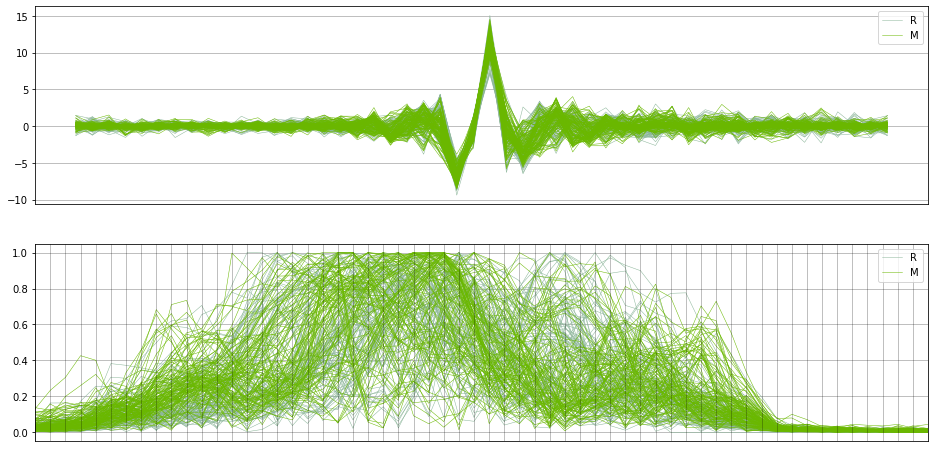

In [ ]:
from pandas.plotting import andrews_curves, parallel_coordinates

fig, axes = plt.subplots(2,1,figsize=(16,8))

andrews_curves(df,'target', samples=50, linewidth=0.5, ax=axes[0])
axes[0].set_xticks([])
parallel_coordinates(df,'target', linewidth=0.5, ax=axes[1],axvlines_kwds={'linewidth': 0.5, 'color': 'black', 'alpha':0.5})
axes[1].set_xticks([])
axes[1].margins(0.05)

In [ ]:
df['target']

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: target, Length: 208, dtype: object

In [ ]:
df['target'] = df['target'].map({'M':0,'R':1})
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: target, Length: 208, dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['target'] =le.fit_transform(df['target'])

In [ ]:
# number of rows and columns
df.shape

(208, 61)

In [ ]:
df.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,target
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
# getting the statistical measures of the data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,target
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [ ]:
# number of missing values in each column
df.isnull().sum()
#df.isnull().sum().sum()==0

0         0
1         0
2         0
3         0
4         0
         ..
56        0
57        0
58        0
59        0
target    0
Length: 61, dtype: int64

In [ ]:
df['target'].value_counts()

0    111
1     97
Name: target, dtype: int64

M --> Mine = 0

R --> Rock = 1

In [ ]:
#groupby by index
df.groupby('target').count()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
target,,,,,,,,,,,,,,,,,,,,,
0,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
1,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97


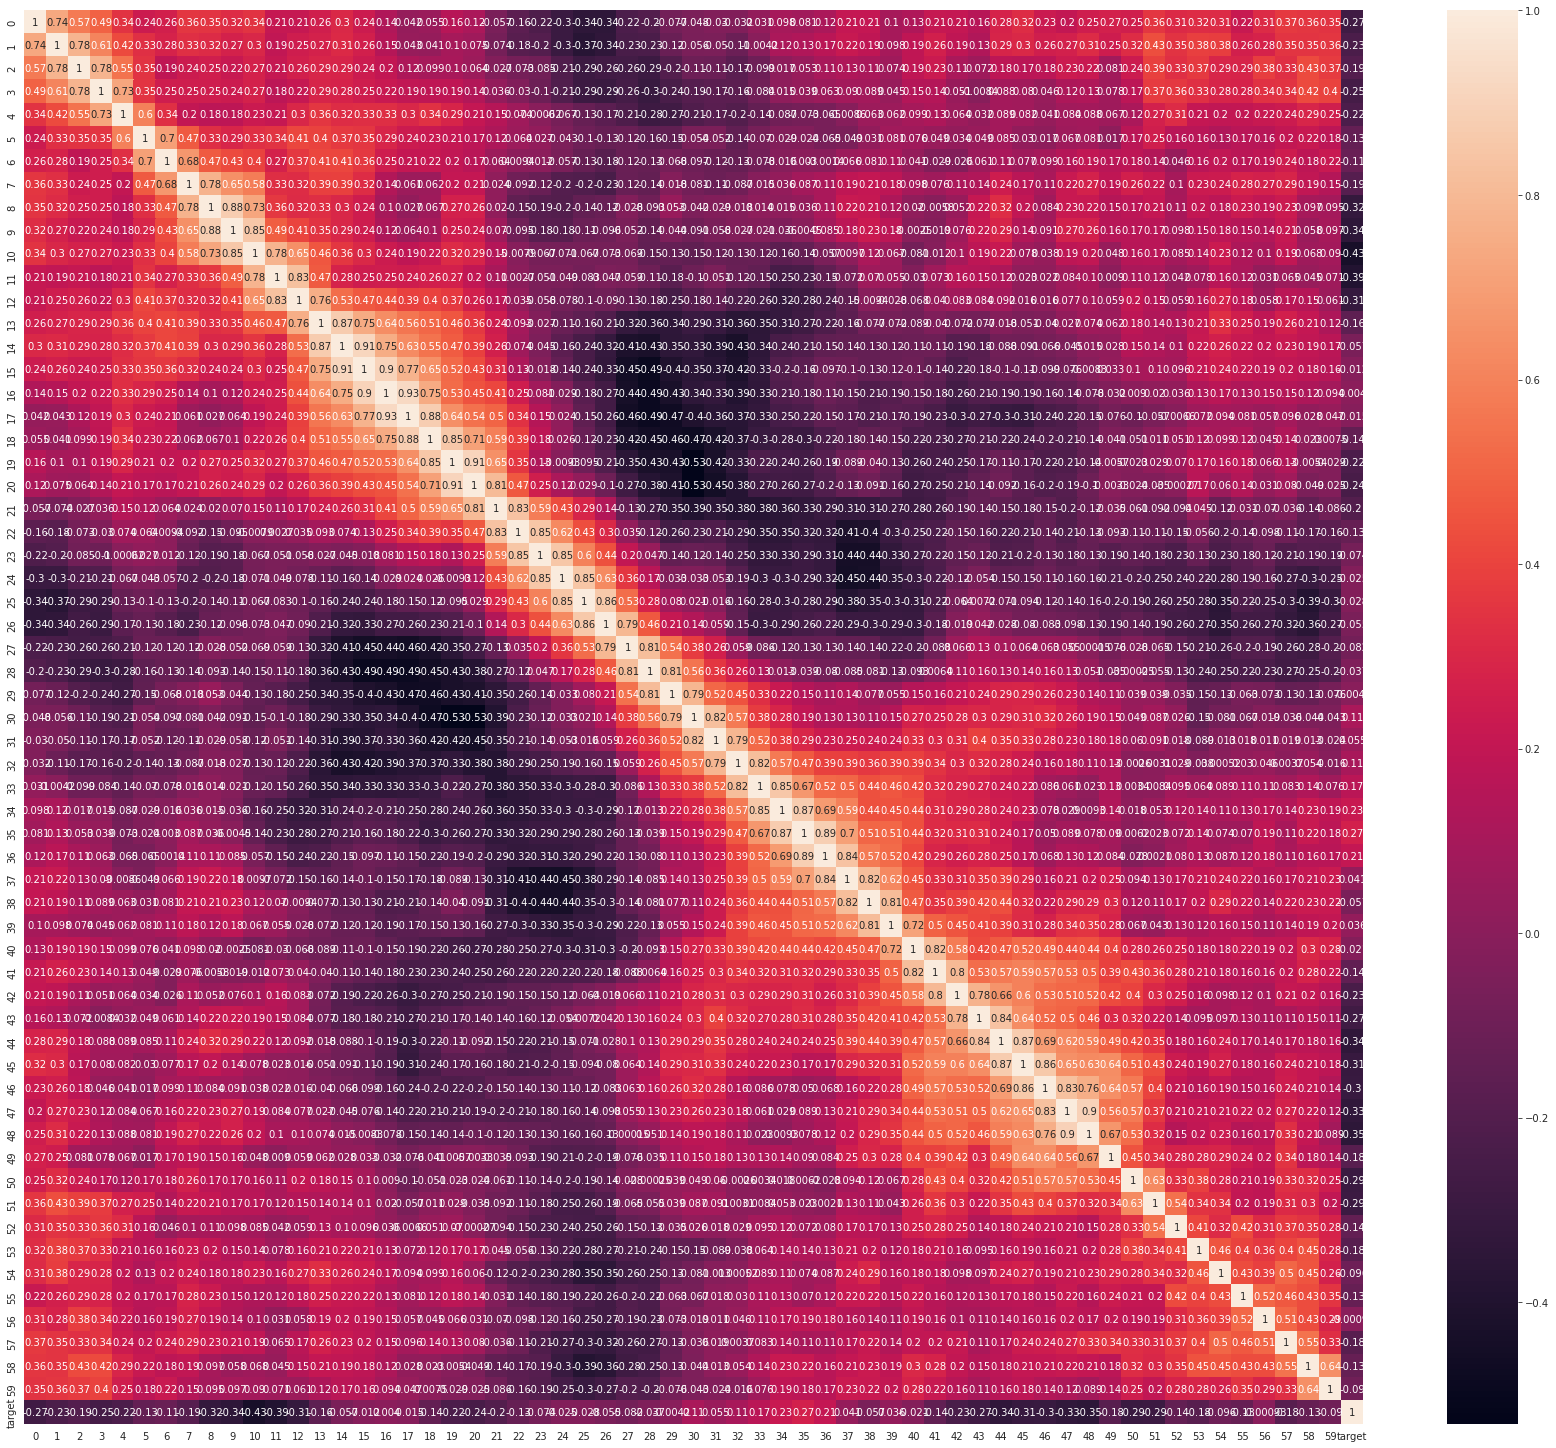

In [ ]:
import seaborn as sns

plt.figure(figsize=(30,26))
sns.heatmap(df.corr(),annot=True);

In [ ]:
#sns.pairplot(df,hue='target')

In [ ]:
# separating features and target
X_ = df.drop(columns='target', axis=1)
y = df['target']

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


In [ ]:
X = standardized_data

Training and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (156, 60) (52, 60)


Model Training --> Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

model = LogisticRegression()

In [ ]:
#training the Logistic Regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [ ]:
#accuracy on test data
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test) 

print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7884615384615384


## Bestmodel

>1, train: 0.814, test: 0.769
>2, train: 0.885, test: 0.788
>3, train: 0.962, test: 0.769
>4, train: 0.994, test: 0.769
>5, train: 1.000, test: 0.827
>6, train: 1.000, test: 0.808
>7, train: 1.000, test: 0.808
>8, train: 1.000, test: 0.808
>9, train: 1.000, test: 0.808
>10, train: 1.000, test: 0.808
>11, train: 1.000, test: 0.808
>12, train: 1.000, test: 0.808
>13, train: 1.000, test: 0.808
>14, train: 1.000, test: 0.808
>15, train: 1.000, test: 0.808
>16, train: 1.000, test: 0.808
>17, train: 1.000, test: 0.808
>18, train: 1.000, test: 0.808
>19, train: 1.000, test: 0.808
>20, train: 1.000, test: 0.808


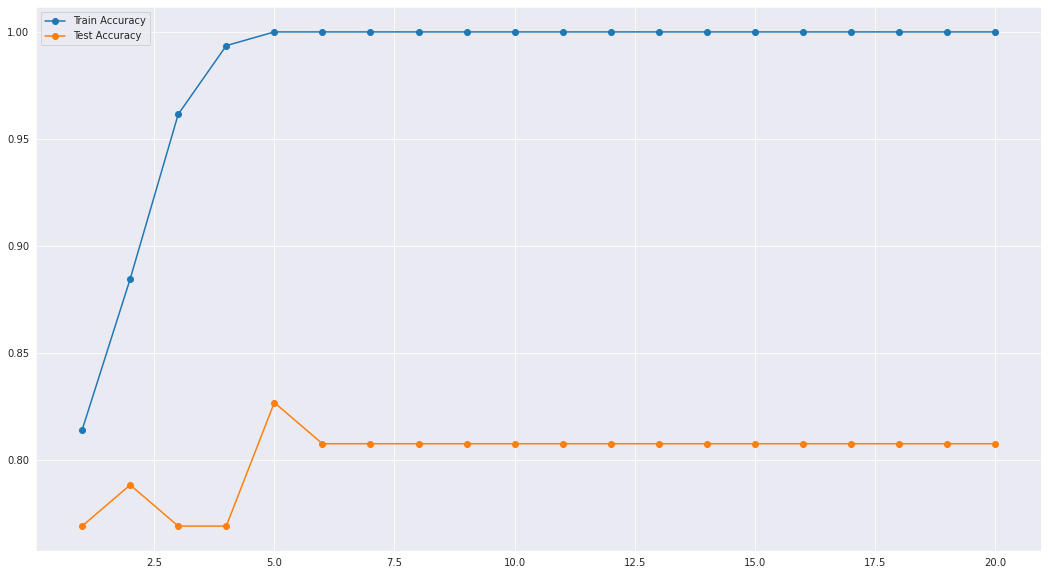

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
## one of the best fit is with depth=5, train: 1.000, test: 0.827

In [ ]:
bestmodel = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)
bestmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=667)

Text(0.5, 0, 'Relative Importance')

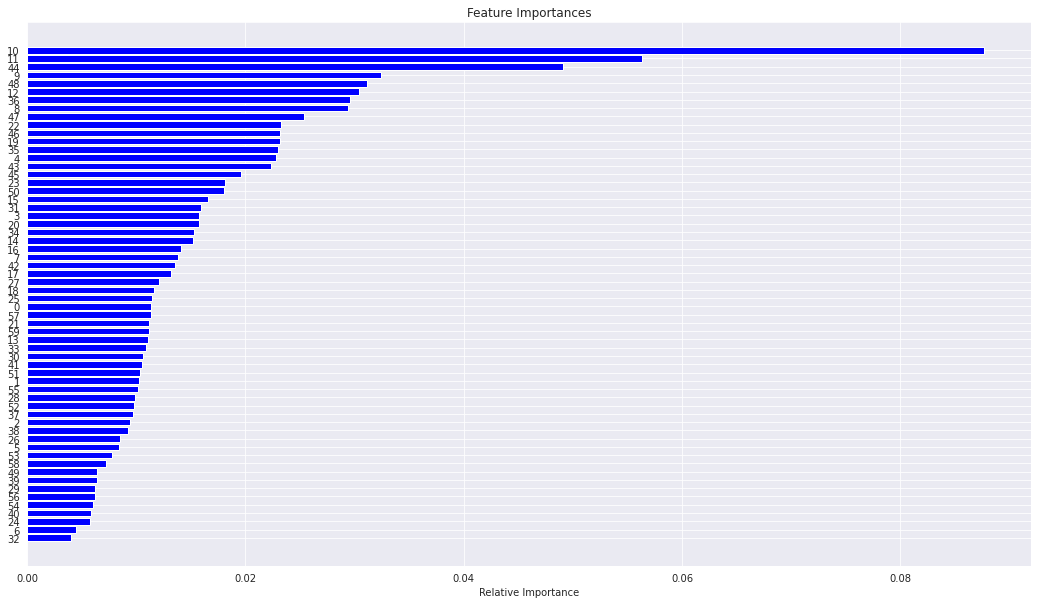

In [ ]:
#Feature importance for Random Forest
features = X_.columns
importances = bestmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## Confusion Matrix

In [ ]:
#Visualize results on a Confusion Matrix:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred_proba = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred_proba)
    plt.figure(figsize =(11,10))
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
    xticklabels=['Mine', 'Rock'],
    yticklabels=['Mine', 'Rock']
    );
    plt.xlabel('predicted')
    plt.ylabel('actual')

# Let's see how our confusion matrix changes with changes to the cutoff!
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

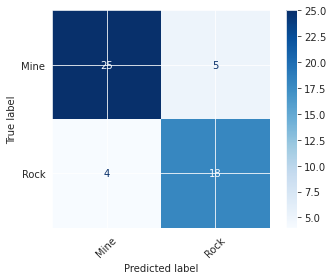

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(bestmodel, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=['Mine', 'Rock'],
                                      xticks_rotation=45,
                                      )
cm;

In [ ]:
from sklearn.metrics import classification_report
labels = ['Mine', 'Rock']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        Mine       0.83      0.80      0.81        30
        Rock       0.74      0.77      0.76        22

    accuracy                           0.79        52
   macro avg       0.78      0.79      0.78        52
weighted avg       0.79      0.79      0.79        52



<img src="https://i.stack.imgur.com/7QIRU.gif" width="400">


## ROC Curves

In [ ]:
!pip install plot-metric --quiet

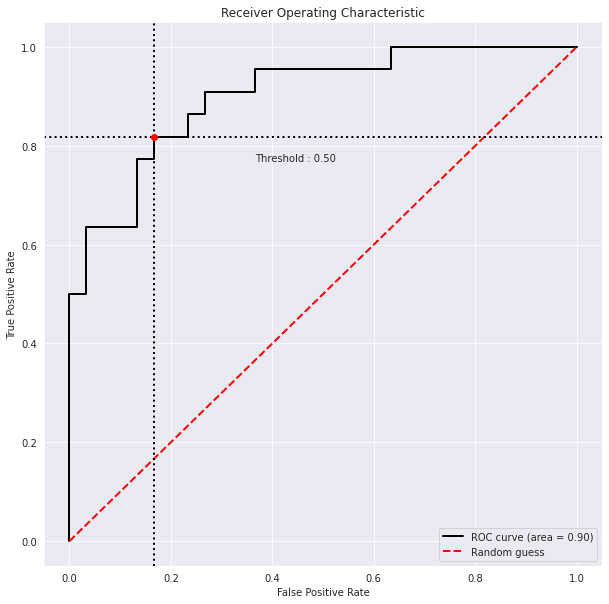

In [ ]:
from plot_metric.functions import BinaryClassification

y_pred_proba = bestmodel.predict_proba(X_test)[::,1]

labels = ["Mine","Rock"]
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.9015151515151516

## P-R Curves

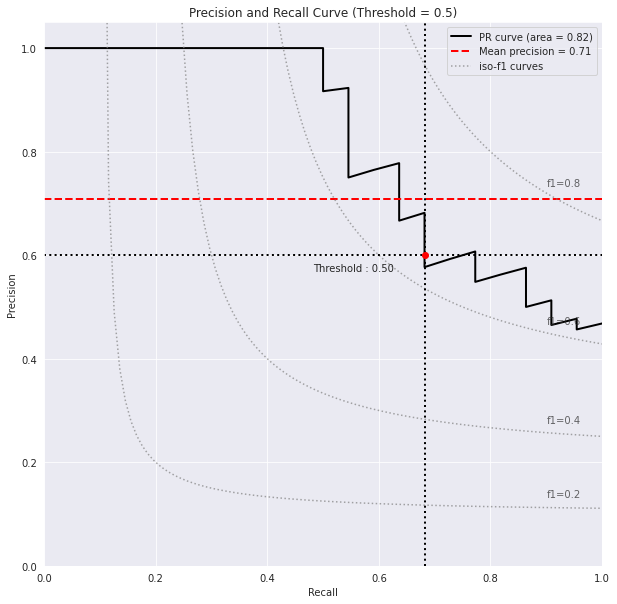

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

## Prediction

In [ ]:
input_data = [0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055]

prediction = bestmodel.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==1):
  print('The object is a Rock')
else:
  print('The object is a Mine')

0
The object is a Mine


In [ ]:
import joblib
joblib.dump(bestmodel,'rf_sonar.pkl')

['rf_sonar.pkl']

In [ ]:
uploaded_model = joblib.load('rf_sonar.pkl')

uploaded_model.predict([input_data])[0] #0 means Mine

0

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5))
        ])

#training the support vector Machine Classifier
pipe.fit(X_train, y_train)
# accuracy score on the test data
y_pred = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
input_data = [0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055]

prediction = pipe.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==1):
  print('The object is a Rock')
else:
  print('The object is a Mine')

In [ ]:
#save pipeline model
import joblib
joblib.dump(pipe,'pipe_diabetic.pkl')

In [ ]:
#Load model
uploaded_model = joblib.load('pipe_diabetic.pkl')

uploaded_model.predict([input_data])[0] #0 The object is a Mine